In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from Utils.preprocessing import EcgDataset, ToTensor


transform = transforms.Compose([
    ToTensor(),
    transforms.Resize([128, 128])
    # transforms.Normalize(mean=[0.5], std=[0.5])
])

train_data = EcgDataset(
    root_dir="Data/training_data/dataset",
    transform=transform
)

val_data = EcgDataset(
    root_dir="Data/validation_data/dataset",
    transform=transform
)

# train_data, val_data = random_split(dataset, [0.8,0.2])

train_loader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)
val_loader = DataLoader(
    val_data,
    batch_size=64,
    shuffle=True
)

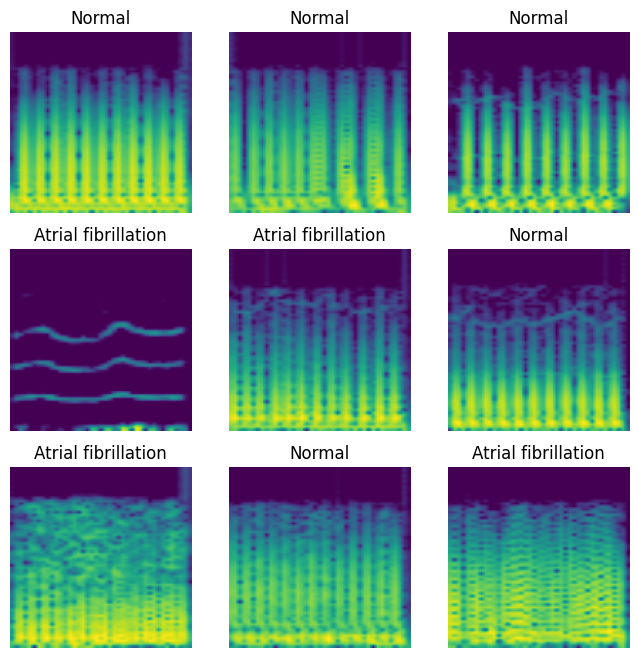

In [2]:
labels_map = {
    0: "Normal",
    1: "Atrial fibrillation"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    # print(sample_idx)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="viridis")
plt.show()

In [3]:
from torchsummary import summary
from Network.afib_detector_v4_2 import AfibDetector

net = AfibDetector()

if torch.cuda.is_available():
    net.cuda()

summary(net, (1,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 64, 64]              80
              ReLU-2            [-1, 8, 64, 64]               0
       BatchNorm2d-3            [-1, 8, 64, 64]              16
         MaxPool2d-4            [-1, 8, 32, 32]               0
       BatchNorm2d-5            [-1, 8, 32, 32]              16
            Conv2d-6           [-1, 16, 32, 32]           1,168
              ReLU-7           [-1, 16, 32, 32]               0
       BatchNorm2d-8           [-1, 16, 32, 32]              32
         MaxPool2d-9           [-1, 16, 16, 16]               0
      BatchNorm2d-10           [-1, 16, 16, 16]              32
        Dropout2d-11           [-1, 16, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           4,640
             ReLU-13           [-1, 32, 16, 16]               0
      BatchNorm2d-14           [-1, 32,

In [4]:
import torch.nn as nn
from torch import optim
from Utils.model_trainer import ModelTrainer
import os

MODEL_PATH = "./Models/afib_detector_v4_2_3/afib_detector_v4_2_3"
if not os.path.exists(os.path.dirname(MODEL_PATH)):
        os.makedirs(os.path.dirname(MODEL_PATH))

learning_rate = 0.0001

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

epochs = 15
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

net.to(device)

modelTrainer = ModelTrainer(MODEL_PATH)

modelTrainer.train_model(
    net,
    train_loader,
    val_loader,
    loss_fn,
    optimizer,
    device,
    epochs
)

Device: cuda:0
EPOCH 1:
	batch 1879 loss: 0.44889890764576756
	batch 3758 loss: 0.3168321111184476
	batch 5637 loss: 0.25966840809555114
	batch 7516 loss: 0.22195170019386992
	batch 9395 loss: 0.20209776606963886
LOSS train 0.20209776606963886 valid 0.7375584659588023 ACCURACY 0.8383606672286987
EPOCH 2:
	batch 1879 loss: 0.18060833217299574
	batch 3758 loss: 0.17214982081928298
	batch 5637 loss: 0.1616180273602623
	batch 7516 loss: 0.15469610461982056
	batch 9395 loss: 0.15355190645036956
LOSS train 0.15355190645036956 valid 0.7162392760828599 ACCURACY 0.8575983047485352
EPOCH 3:
	batch 1879 loss: 0.14190732011152207
	batch 3758 loss: 0.13770790368084612
	batch 5637 loss: 0.13314887461564273
	batch 7516 loss: 0.13089821149534117
	batch 9395 loss: 0.1275040564841495
LOSS train 0.1275040564841495 valid 0.8345542200430289 ACCURACY 0.8534964323043823
EPOCH 4:


KeyboardInterrupt: 